In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
a = np.load('pose_result__data_paper_180918_MDN_PR_Fly1_001_SG1_behData_images.pkl')
data = a['points3d'].copy()
print('The dimension is ')
print(data.shape)

The dimension is 
(899, 38, 3)


In [3]:
def views(data,t,sch1,sch2):
    '''meaningful input: top view:(0,2)  left view:(1,0)  front view:(1,2)'''
    mapp = np.zeros((800,800))
    for i in set(range(0,34))-set(range(15,19)):#range(0,34):#data.shape[1]):  #  [0,5,19,24,10,29,15,34]:
        for j in range(-5,5):
            for k in range(-5,5):
                mapp[int(100*data[t,i,sch1]+300)+j,int(300+100*data[t,i,sch2])+k] = 10
    plt.imshow(mapp)
    #cv2.imshow('projection',mapp)
    #cv2.waitKey(10)
def intersection_angle(a,b):
    return np.arccos(a@b/np.linalg.norm(a)/np.linalg.norm(b))
def ag2(angle):
    return angle/np.pi*180
def rotaMatr(v1,v2):
    u = np.cross(v1,v2)
    u = u/np.linalg.norm(u)
    th = intersection_angle(v1,v2)
    r = np.zeros((3,3))
    c = np.cos(th)
    s = np.sin(th)
    ux = u[0]
    uy = u[1]
    uz = u[2]
    r[0,0] = c + ux**2*(1-c)
    r[0,1] = ux*uy*(1-c) - uz*s
    r[0,2] = ux*uz*(1-c) + uy*s
    
    r[1,0] = ux*uy*(1-c) + uz*s
    r[1,1] = c + uy**2*(1-c)
    r[1,2] = uy*uz*(1-c) - ux*s
    
    r[2,0] = uz*ux*(1-c) - uy*s
    r[2,1] = uz*uy*(1-c) + ux*s
    r[2,2] = c + uz**2*(1-c)
    return r

an = 30/180*np.pi
x_ref = np.array([np.sin(an),0,np.cos(an)])
print(x_ref)

coord_x = x_ref
coord_y = np.array([0,-1,0])
coord_z = np.cross(coord_x,coord_y)
print('left-coordinate x :', coord_x)
print('left-coordinate y :', coord_y)
print('left-coordinate z :', coord_z)
R_std = rotaMatr(x_ref,np.array([0,0,1]))
std_data = np.zeros(data.shape)
for i in range(899):
    std_data[i,:,:] = (R_std @ (data[i,:].T)).T

[0.5       0.        0.8660254]
left-coordinate x : [0.5       0.        0.8660254]
left-coordinate y : [ 0 -1  0]
left-coordinate z : [ 0.8660254  0.        -0.5      ]


Left view


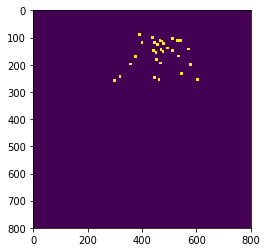

In [6]:
print("Left view")
views(std_data,0,1,0)

top view


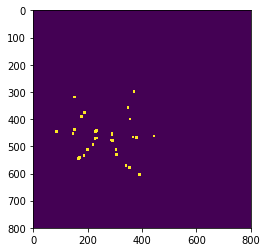

In [8]:
print("top view")
views(std_data,0,0,2)

front view


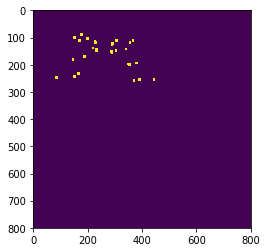

In [9]:
print("front view")
views(std_data,0,1,2)